19.211


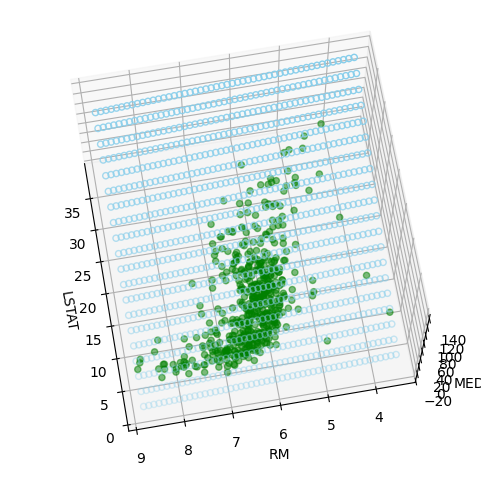

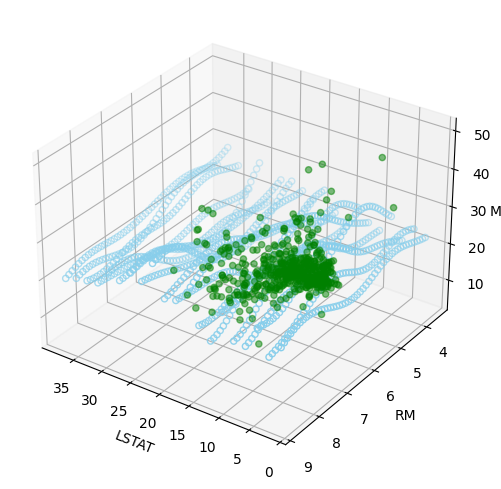

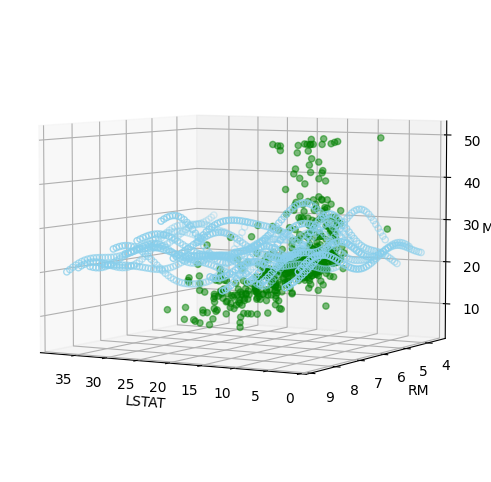

In [56]:
, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt'
df = pd.read_csv(url, header = None, sep = '\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df[['RM', 'LSTAT']].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)
regr = LinearRegression()
regr.fit(X_train_std, y_train)
from sklearn.kernel_approximation import RBFSampler
r = RBFSampler(gamma = 0.5, random_state = 10)
X_test_rbf = r.fit_transform(X_test_std)
X_train_rbf = r.fit_transform(X_train_std)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.5 , random_state = 200)
ridge.fit(X_train_rbf, y_train)
y_pred = ridge.predict(X_test_rbf)
mse = mean_squared_error(y_test, y_pred)
print("%.3f" %mse)

fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(111, projection = '3d')
x = df['LSTAT'].values
y = df['RM'].values
z = df['MEDV'].values
x_pred = np.linspace(x.min(), x.max(), 20)
y_pred = np.linspace(y.min(), y.max(), 50)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
z_pred = regr.predict(model)
ax.scatter(xx_pred, yy_pred, z_pred, facecolor = (0,0,0,0), s = 20, edgecolor = 'skyblue', zorder = 5)
ax.scatter(x, y , z, color = 'g', zorder =15, alpha = 0.5, marker = 'o')
ax.set_xlabel('LSTAT',fontsize = 10)
ax.set_ylabel('RM', fontsize = 10)
ax.set_zlabel('MEDV', fontsize = 10)
ax.view_init(70,170)
plt.show()

ridge.fit(X_train_rbf, y_train)
fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(111, projection = '3d')
x = df['LSTAT'].values
y = df['RM'].values
z = df['MEDV'].values
x_pred = np.linspace(x.min(), x.max(), 20)
y_pred = np.linspace(y.min(), y.max(), 50)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
model_viz = r.fit_transform(model)
z_pred = ridge.predict(model_viz)
ax.scatter(xx_pred, yy_pred, z_pred, facecolor = (0,0,0,0), s = 20, edgecolor = 'skyblue', zorder = 5)
ax.scatter(x, y , z, color = 'g', zorder =15, alpha = 0.5, marker = 'o')
ax.set_xlabel('LSTAT',fontsize = 10)
ax.set_ylabel('RM', fontsize = 10)
ax.set_zlabel('MEDV', fontsize = 10)
ax.view_init(30,125)
plt.show()

ridge.fit(X_train_rbf, y_train)
fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(111, projection = '3d')
x = df['LSTAT'].values
y = df['RM'].values
z = df['MEDV'].values
x_pred = np.linspace(x.min(), x.max(), 20)
y_pred = np.linspace(y.min(), y.max(), 50)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
model_viz = r.fit_transform(model)
z_pred = ridge.predict(model_viz)
ax.scatter(xx_pred, yy_pred, z_pred, facecolor = (0,0,0,0), s = 20, edgecolor = 'skyblue', zorder = 5)
ax.scatter(x, y , z, color = 'g', zorder =15, alpha = 0.5, marker = 'o')
ax.set_xlabel('LSTAT',fontsize = 10)
ax.set_ylabel('RM', fontsize = 10)
ax.set_zlabel('MEDV', fontsize = 10)
ax.view_init(5,120)
plt.show()